In [13]:
# Dependencies and Setup
import pandas as pd

# File to Load 
measurement_data_to_load = "Resources/hawaii_measurements.csv"
station_data_to_load = "Resources/hawaii_stations.csv"

measurement_data = pd.read_csv(measurement_data_to_load)
station_data = pd.read_csv(station_data_to_load)

In [14]:
measurement_data.dtypes
# Convert str date to datetime 
measurement_data['date'] = pd.to_datetime(measurement_data['date'], errors='coerce')
june = measurement_data.loc[(measurement_data['date'].dt.month == 6)]
dec = measurement_data.loc[(measurement_data['date'].dt.month == 12)]
print(f"June average temp = {june.tobs.mean()}")
print(f"December average temp = {dec.tobs.mean()}")

June average temp = 74.94411764705882
December average temp = 71.04152933421226


In [3]:
import scipy.stats as stats 

In [4]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(june.tobs, dec.tobs, equal_var=False)

# The null hypothesis can be is there a meaningful difference between the temperature in June and December?
# Since pvalue is less than 0.05 we can reject the null hypothesis. 

# I think I will an unpaired t-test because temperature recorded for June and December were distinct test subjects which requires or equivalent to a two-sample t-test.  

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

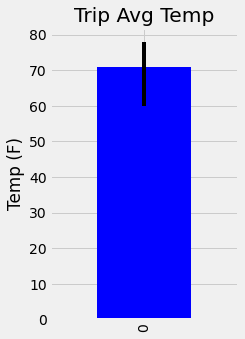

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, cast, Date, distinct, extract

engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
## Trip Date Range
#print(calc_temps('2016-12-12', '2016-12-25'))
stat = calc_temps('2016-12-12', '2016-12-25')

df = pd.DataFrame(stat, columns = ['Min','Avg','Max'])
plt.title("Trip Avg Temp")
ax = df['Avg'].plot(kind = 'bar', yerr=[df.Avg-df.Min, df.Max-df.Avg], figsize=(3,5), color='blue')
plt.ylabel("Temp (F)")
plt.show()
plt.tight_layout() 


In [12]:
x= session.query(Measurement.date,Measurement.tobs).filter(func.extract("year", Measurement.date) == 2016).all()

Text(0.5, 0, 'Date')

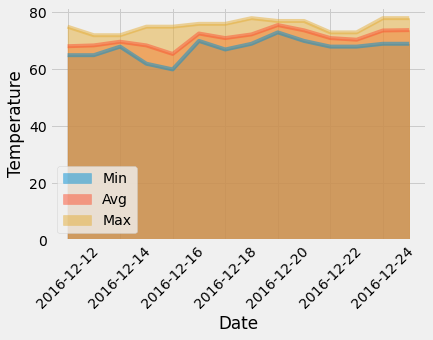

In [11]:
import datetime

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.date,func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).filter(Measurement.date).filter(func.extract("year", Measurement.date) == 2016).all()

## Trip Date Range
s = datetime.datetime(2016, 12, 12)
t = datetime.datetime(2016, 12, 25)

all_temp = []
for x in pd.date_range(start=s, end=t, freq='1D'):
        all_temp.extend(daily_normals(x.strftime("%m-%d")))

df = pd.DataFrame(all_temp, columns = ['date','Min','Avg','Max'])
tempStat = df.set_index("date")

# Plot area graph
tempStat.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.ylabel("Temperature")
plt.xlabel("Date")